# 泰坦尼克号生还者预测项目

# 项目背景

泰坦尼克号生还者预测项目是kaggle上的经典项目，数据集带有一定复杂度，覆盖的知识面与涉及的技能相对较多。为了进一步熟悉巩固利用Python的numpy、pandas、matplotlib、seaborn、sklearn等库进行数据探索、预处理、可视化、数据清理、数据建模等分析挖掘任务，并进行分类模型的效果评估，加深对数据分析挖掘工作的理解，特做该项目进行实战练习。

# 项目分析目的及内容

泰坦尼克号灾难中，根据乘客性别、年龄、乘客等级、亲属情况等等特征，预测生还者。对kaggle给出的训练集中的数据进行探索及可视化分析，分别找出乘客各特征对生还影响的大小，然后对数据进行清洗并建模，根据模型预测测试集中乘客的生还情况。

# 一、数据导入与探索

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

# 将两个文件放在同目录下，通过pandas读取数据
train_data = pd.read_csv(r'D:\practice\Titannic\train.csv')
test_data = pd.read_csv(r'D:\practice\Titannic\test.csv')

display(train_data.head(n=2))
train_data.info()
print(train_data.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


训练集共有11个特征，其中有三个缺失特征，上船地点缺失较少，仅2个缺失；年龄缺失20%左右；舱位大部分缺失，缺失近80%数据。
特征：
1、PassengerID:乘客ID
2、Pclass:乘客等级
3、Name：姓名
4、Sex：性别
5、Age：年龄
6、SibSp:兄弟姐妹个数
7、Parch：直系亲属个数
8、Ticket：船票信息
9、Fare：票价
10、Cabin：客舱
11、Embarked：上船港口
预测目标：
Survived:生还情况

In [2]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


乘客等级特征中位数大于平均值，该特征左偏，乘客等级偏低的人更多；平均年龄与中位数年龄接近，说明船上青壮年为主，年龄分布跨度大；拖家带口的人是少数，大部分是单人出行；票价平均值大于中位数，特征右偏，最大值512，远大于平均值，最小值是0，该特征问题较大，需要重点分析处理。以上处理理解数据结构，是否存在异常值及特征如何处理，需要进一步通过可视化分析。

# 数据可视化分析

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")#设置图表样式
sns.set_style({'font.sans-serif':['simhei','Arial']})#设置SN图表样式

由于数据集特征较多，为方便分析，将特征分为定类特征：Pclass、Name、Sex、SibSp、Embarked、Parch、Ticket、Cabin；定比特征：Age、Fare。乘客ID是无用特征，最后删除。

1、定类特征分析

（1）查看各特征数量

In [4]:
column_dinglei = ['Pclass','Name','Sex','SibSp','Embarked','Parch','Ticket','Cabin']
for n,i in enumerate(column_dinglei):  #遍历列表索引及其元素
    tezheng_num = train_data[i].value_counts().index.shape[0]
    print('{0}. {1}特征的数量是: {2}'.format(n+1,i,tezheng_num))

1. Pclass特征的数量是: 3
2. Name特征的数量是: 891
3. Sex特征的数量是: 2
4. SibSp特征的数量是: 7
5. Embarked特征的数量是: 3
6. Parch特征的数量是: 7
7. Ticket特征的数量是: 681
8. Cabin特征的数量是: 147


Name、Ticket与Cabin特征数量太大，不适合直接做可视化分析，需要进一步处理；首先对Pclass、Sex、SibSp、Embarked、Parch这几个特征可视化。

（2）单因素对生还率的影响

Text(0.5,1,'The influence of Parch')

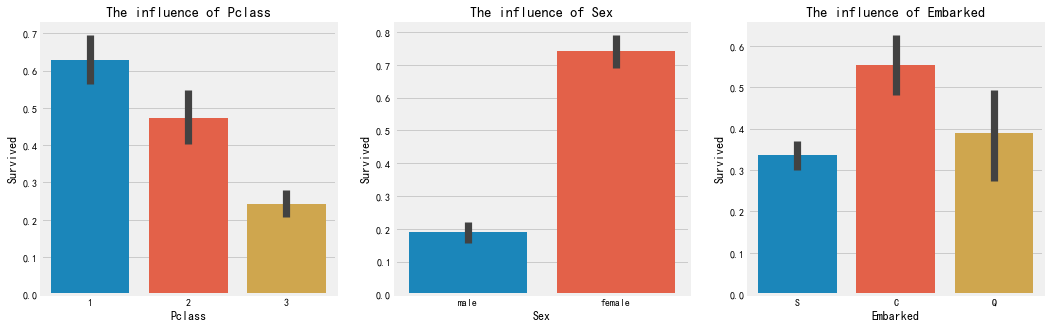

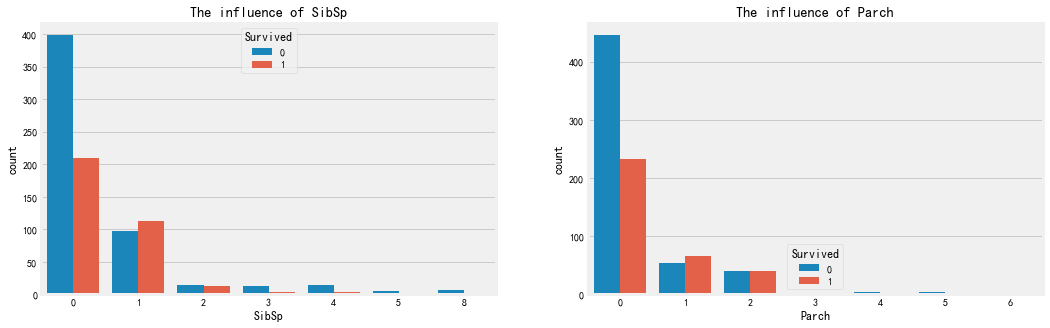

In [5]:
fig,axes=plt.subplots(1,3,figsize=(16,5))

ax1=plt.subplot(1,3,1)
sns.barplot(train_data['Pclass'],train_data['Survived'],ax=ax1)
ax1.set_title('The influence of Pclass')

ax2=plt.subplot(1,3,2)
sns.barplot(train_data['Sex'],train_data['Survived'],ax=ax2)
ax2.set_title('The influence of Sex')

ax3=plt.subplot(1,3,3)
sns.barplot(train_data['Embarked'],train_data['Survived'],ax=ax3)
ax3.set_title('The influence of Embarked')

fig,axes=plt.subplots(1,2,figsize=(16,5))

ax1=plt.subplot(1,2,1)
sns.countplot(x='SibSp',hue='Survived',data=train_data,ax=ax1)
ax1.set_title('The influence of SibSp')

ax2=plt.subplot(1,2,2)
sns.countplot(x='Parch',hue='Survived',data=train_data,ax=ax2)
ax2.set_title('The influence of Parch')

由上图可见，乘客等级越高，生还率越高；女性生还率远大于男性；登船港口对生还率的影响分别为：C>Q>S；直觉兄弟姐妹或直系亲属数量越多，生还率越高，实则不然，有一个兄弟姐妹或直系亲属时生还率明显上升，但有2、3、4个或更多时，生还率又明显下降，可见2人组合是最容易生还的，人数过多往往瞻前顾后，生还率反而下降。SibSp与Parch特征对生还的影响比较接近。

（3）多因素对生还率的影响

c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


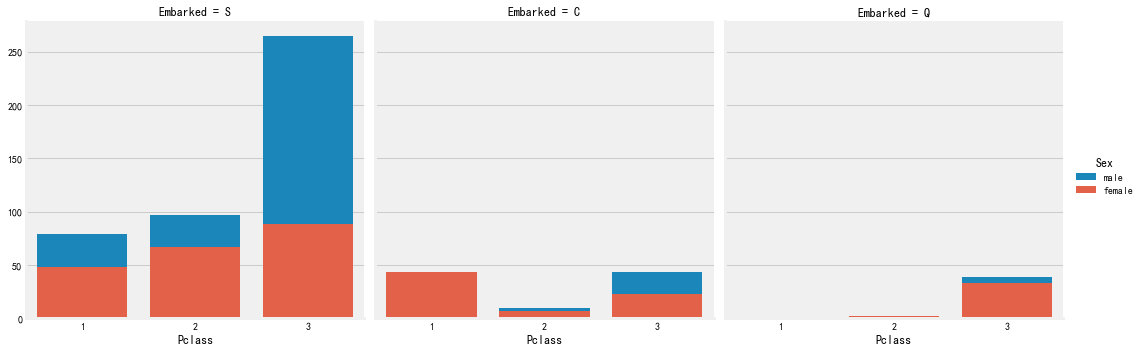

In [6]:
#乘客不同等级，不同性别在不同上船港口的数量。
PSE=sns.FacetGrid(train_data,col='Embarked',hue='Sex',size=5)
PSE.map(sns.countplot,'Pclass')
PSE.add_legend()

三个港口中，从S港口上船生还的人数最多，生还乘客等级高的人中女性居多，等级低的生还乘客男性居多，说明乘客等级不同素质差异很大；C港口中等级高的人几乎都为女性；Q港口上船生还的人最少，且大部分是等级较低的乘客，同样获救者女性居多。可见S是主要上船港口，C属于贵族型港口，Q港口主要面向底层人士。

2、定比特征分析

（1）Fare特征分析

c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Fare group by Pclass:boxplot ')

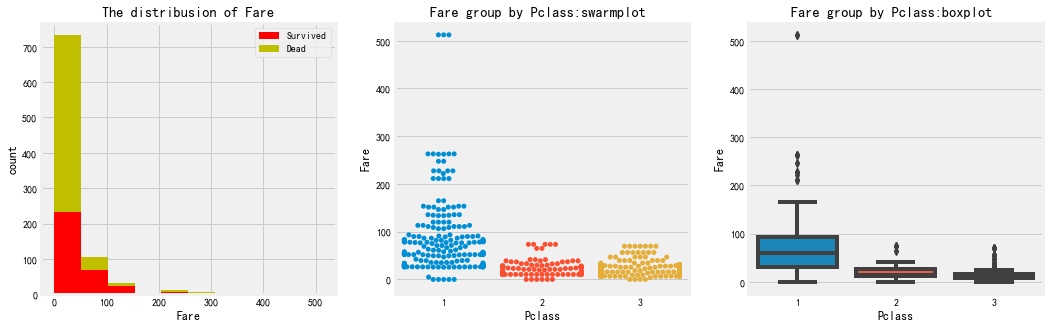

In [7]:
fig,axes=plt.subplots(1,3,figsize=(16,5))

ax1=plt.subplot(1,3,1)
plt.hist(x = [train_data[train_data['Survived']==1]['Fare'], train_data[train_data['Survived']==0]['Fare']], 
         stacked=True,color = ['r','y'],label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('count')
plt.title('The distribusion of Fare')
plt.legend()

ax3=plt.subplot(1,3,2)
sns.swarmplot(x='Pclass',y='Fare',data=train_data,ax=ax3)
ax3.set_title('Fare group by Pclass:swarmplot ')

ax4=plt.subplot(1,3,3)
sns.boxplot(x='Pclass',y='Fare',data=train_data,ax=ax4)
ax4.set_title('Fare group by Pclass:boxplot ')


乘客等级越高，票价越高，且第一等级票价显著高于其它两个等级，属于贵族群体,票价越高的人，生还率更高；其中，第一等级乘客中，票价存在异常值。

In [8]:
train_data[train_data['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


从信息中可以看到三个异常值其它特征比较一致，如Ticket、Fare、Embarked、Cabin，因此，可能不是异常值，后面通过特征工程进一步处理。

（2）Age特征分析

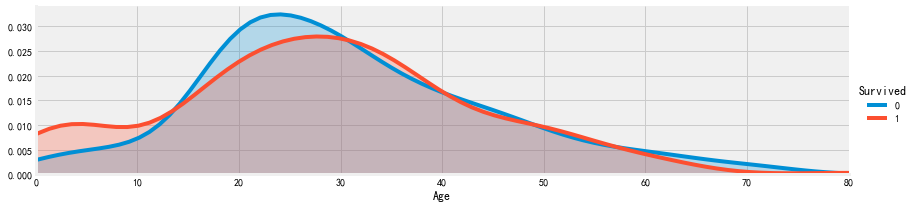

In [9]:
#不同年龄的生还情况
asd=sns.FacetGrid( train_data, hue = 'Survived', aspect=4 )
asd.map(sns.kdeplot, 'Age', shade= True )
asd.set(xlim=(0, train_data['Age'].max()))
asd.add_legend()

不同年龄生还情况有所差异，10岁以下的儿童生还率最高，20-30岁的青壮年生还率最低，另外60岁以上的老人生还率急剧下降，估计因为现场混乱，老年人行动不便。

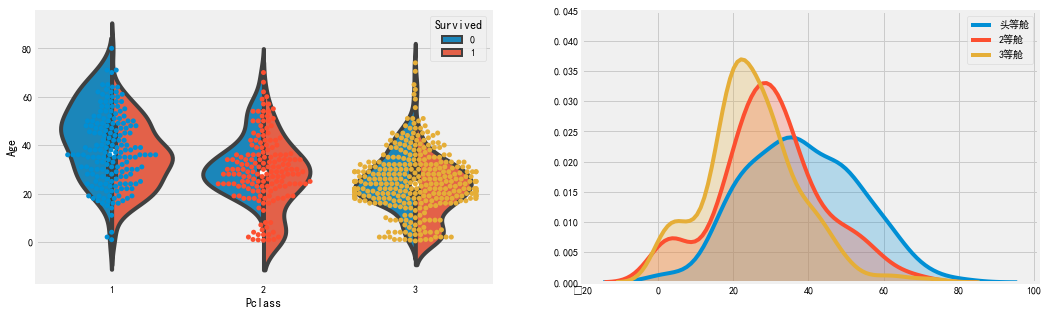

In [10]:
#不同等级、不同年龄的乘客分布与生还情况
fig, [ax1,ax2]=plt.subplots(1,2,figsize=(16,5))

sns.violinplot(x='Pclass',y='Age', hue='Survived', data=train_data, split=True, ax=ax1)
sns.swarmplot(x='Pclass', y='Age', data=train_data, ax =ax1)

sns.kdeplot(train_data[(train_data['Pclass']==1) & (train_data['Age'].notnull()==True)]['Age'], shade=True).set(ylim = (0, 0.045))
sns.kdeplot(train_data[(train_data['Pclass']==2) & (train_data['Age'].notnull()==True)]['Age'], shade=True)
sns.kdeplot(train_data[(train_data['Pclass']==3) & (train_data['Age'].notnull()==True)]['Age'], shade=True)
plt.legend([u'头等舱', u'2等舱',u'3等舱'],loc='best')


可见，等级越高的乘客，年龄普遍偏大，等级低的人年龄普遍是20岁左右的年轻人；所以不同等级的乘客生还年龄也符合这个规律，即等级越高，生还者年龄更大。

3、简单特征相关性分析

Text(0.5,1.05,'Pearson Correlation of Features')

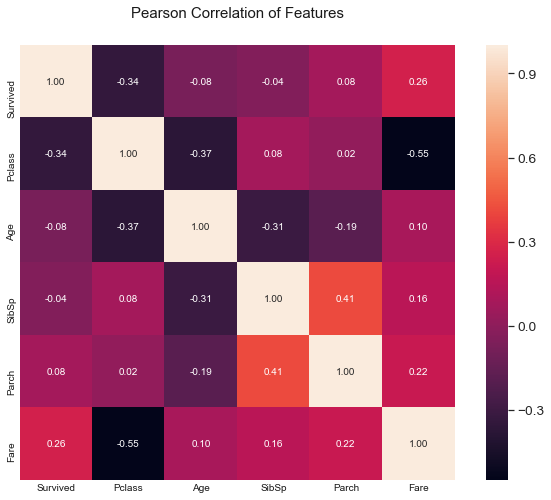

In [11]:
plt.subplots(figsize=(10,8))
corrmat=train_data[train_data.columns[1:]].corr()
sns.set(font_scale=1.25)
hm=sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Pearson Correlation of Features', y=1.05, size=15)

可见，5个特征中票价、社会等级对生还的影响最大，直系亲属、兄弟姐妹、年龄对生还也有一定影响。其余复杂特征进一步通过特征工程完成分析处理。

# 数据预处理

In [12]:
#合并训练集与测试集
combine_data=train_data.append(test_data)
print(combine_data.shape)
print(combine_data.isnull().sum())

(1309, 12)
Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64


1、缺失值处理

（1）Fare缺失值填充

In [13]:
#查看Fare缺失数据,返回缺失行
combine_data[combine_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


该缺失值只有一个乘客，可以根据该乘客的其它信息（比如年龄60岁以上，港口是S，等级是3，男性），看看符合其特征的其它乘客情况。

In [14]:
combine_data[(combine_data['Age']>60)&(combine_data['Embarked']=='S')&(combine_data['Sex']=='male')&(combine_data['Pclass']==3)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
326,61.0,NaN,S,6.2375,"Nysveen, Mr. Johan Hansen",0,327,3,male,0,0.0,345364
851,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,852,3,male,0,0.0,347060
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [15]:
#用相似乘客的票价平均值填充
combine_data['surname']=combine_data['Name'].apply(lambda x: x.split(',')[0].lower())
#返回Fare列的均值
meanFare=combine_data[(combine_data['Age']>60)&(combine_data['Embarked']=='S')&(combine_data['Sex']=='male')&(combine_data['Pclass']==3)].Fare.mean()
combine_data.loc[combine_data['surname']=='storey','Fare']=meanFare

（2）Embarked缺失值填充

In [16]:
##查看Embarked缺失数据,返回缺失行
combine_data[combine_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,surname
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,icard
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,stone


In [17]:
num=combine_data[(combine_data['Pclass']==1)&(combine_data['Sex']=='female')]
print('等级为1的女性在C港口上船的人数是:',(num['Embarked']=='C').sum())
print('等级为1的女性在S港口上船的人数是:',(num['Embarked']=='S').sum())

等级为1的女性在C港口上船的人数是: 71
等级为1的女性在S港口上船的人数是: 69


根据众数原则，选择C港口填充。

In [18]:
combine_data['Embarked']=combine_data['Embarked'].fillna('C')

（3）Cabin缺失值填充

Cabin特征有近80%的缺失值，不适合大量填充，删除较可惜，尝试将缺失值当做一个特征，命名为CabinNull。

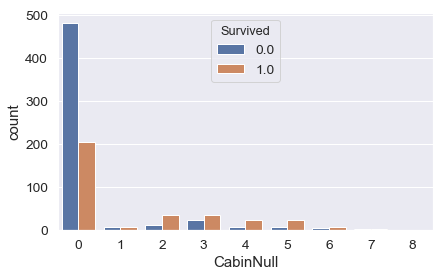

In [19]:
#用0填充Cabin缺失值，并提取未缺失Cabin特征的第一个字母作为新的分类依据,通过codes变为数字。
combine_data['CabinNull'] = pd.Categorical(combine_data.Cabin.fillna('0').apply(lambda x: x[0])).codes

#可视化，观察CabinNull的数据特征
sns.countplot(x='CabinNull', hue='Survived',data=combine_data)

可见在未缺失Cabin的乘客中，生还率明显大于死亡率，缺失的部分乘客，大都未能生还，所以缺失值可以作为判断生还的一个重要特征。

（4）Age缺失值处理

Age缺失值较多，有20%左右，这里选择使用其它特征来预测Age，为保证预测的准确性，在预测Age缺失值之前，先对其它数据特征进行一些处理。

（5）数据一致性分析

该部分需要非常熟悉业务且对数据非常敏感，难度较大，本人也是通过查阅几位大神的分析经验，进行一定的整合利用。

In [20]:
#SibSp和Parch特征错误
combine_data.loc[combine_data['surname']=='abbott',['Name','Sex','Age','SibSp','Parch']]

,Name,Sex,Age,SibSp,Parch
279,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1
746,"Abbott, Mr. Rossmore Edward",male,16.0,1,1
392,"Abbott, Master. Eugene Joseph",male,13.0,0,2


明显这家人是一位妈妈带着两个儿子，279与392的SibSp与Parch特征需要互换。

In [21]:
combine_data.loc[(combine_data['surname']=='abbott')&(combine_data['Age']==35),'SibSp'] = 0
combine_data.loc[(combine_data['surname']=='abbott')&(combine_data['Age']==35),'Parch'] = 2
combine_data.loc[(combine_data['surname']=='abbott')&(combine_data['Age']==13),'SibSp'] = 1
combine_data.loc[(combine_data['surname']=='abbott')&(combine_data['Age']==13),'Parch'] = 1

In [22]:
#同样是SibSp和Parch特征错误
combine_data.loc[combine_data['surname']=='ford',['Name','Sex','Age','SibSp','Parch']]

,Name,Sex,Age,SibSp,Parch
86,"Ford, Mr. William Neal",male,16.0,1,3
147,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2
436,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2
736,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3
167,"Ford, Mr. Edward Watson",male,18.0,2,2
289,"Ford, Mr. Arthur",male,NaN,0,0


这家人应该是一对中年夫妇，有四个孩子，289号父亲在四五十岁左右，SibSp为0，Parch为4；

In [23]:
#进行修改填充
combine_data.loc[(combine_data['surname']=='ford')&(combine_data['Age']==16),'SibSp']=3
combine_data.loc[(combine_data['surname']=='ford')&(combine_data['Age']==16),'Parch']=1
combine_data.loc[(combine_data['surname']=='ford')&(combine_data['Age']==9),'SibSp']=3
combine_data.loc[(combine_data['surname']=='ford')&(combine_data['Age']==9),'Parch']=1
combine_data.loc[(combine_data['surname']=='ford')&(combine_data['Age']==21),'SibSp']=3
combine_data.loc[(combine_data['surname']=='ford')&(combine_data['Age']==21),'Parch']=1
combine_data.loc[(combine_data['surname']=='ford')&(combine_data['Age']==48),'SibSp']=0
combine_data.loc[(combine_data['surname']=='ford')&(combine_data['Age']==48),'Parch']=4
combine_data.loc[(combine_data['surname']=='ford')&(combine_data['Age']==18),'SibSp']=3
combine_data.loc[(combine_data['surname']=='ford')&(combine_data['Age']==18),'Parch']=1
combine_data.loc[(combine_data['surname']=='ford')&(combine_data['Age'].isnull()),'SibSp']=0
combine_data.loc[(combine_data['surname']=='ford')&(combine_data['Age'].isnull()),'Parch']=4

In [24]:
#查看填充后效果
combine_data.loc[combine_data['surname']=='ford',['Name','Sex','Age','SibSp','Parch']]

,Name,Sex,Age,SibSp,Parch
86,"Ford, Mr. William Neal",male,16.0,3,1
147,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,3,1
436,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,3,1
736,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,0,4
167,"Ford, Mr. Edward Watson",male,18.0,3,1
289,"Ford, Mr. Arthur",male,NaN,0,4


2、数据转换

定类特征不能直接用来建模，需要进行量化才能使用，在此将Sex、Embarked等特征进行装换，Name、Ticket之前没有分析，因为其多样性太高，在此提取新特征，转换为可使用的形式。

In [25]:
import re
# 用正则表达式从Name中提取NameHead信息，即称谓，称谓代表一个人的社会地位，按之前的分析社会地位不同，生还率差异较大。
combine_data['NameHead'] =combine_data['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.',x).group(1))
NameHead_mapping={'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5, 'Rev': 6, 'Major': 7, 'Col': 7, 'Mlle': 2,
                 'Mme': 3,'Don': 9,'Dona': 9, 'Lady': 10, 'Countess': 10, 'Jonkheer': 10, 'Sir': 9, 'Capt': 7, 'Ms': 2}
# 量化NameHead信息
combine_data['NameHeadCat']=combine_data.loc[:,'NameHead'].map(NameHead_mapping)

# SibSp和Parch特征进行组合
combine_data['FamilyCat']=combine_data['SibSp']+combine_data['Parch']+1
# 根据Family分布进行分箱
combine_data['FamilyCat']=pd.cut(combine_data['FamilyCat'], bins=[0,1,4,20], labels=[0,1,2])

# 从Name特征衍生出Name的长度
combine_data['NameLengthCat']=combine_data['Name'].apply(lambda x: len(x))

# 量化Embarked特征
combine_data['Embarked']=pd.Categorical(combine_data.Embarked).codes

# 对Sex特征进行独热编码分组
combine_data=pd.concat([combine_data,pd.get_dummies(combine_data['Sex'])],axis=1)

通过数据转换，提取Name特征的称谓组成一个新的特征NameHeadCat,并量化；SibSp、Parch特征特点一致，合并为一个特征FamilyCat；提取Name长度作为一个新特征NameLengthCat，在西方国家，贵族名字长度较短；将Embarked定类特征量化；对Sex特征进行独热编码量化。

3、进一步衍生新特征

（1）Age衍生特征

通过之前的分析发现，一部分人群生还率比较显著，比如儿童（0-13岁）生还率非常高，成年女性生还比率也高。

In [26]:
def get_person(passenger):
    age, sex = passenger
    if (age < 13):
        return 'child'
    elif (sex == 'female'):
        return 'female_adult'
    else:
        return 'male_adult'

combine_data= pd.concat([combine_data, pd.DataFrame(combine_data[['Age', 'Sex']].apply(get_person, axis=1), columns=['person'])],axis=1)
combine_data= pd.concat([combine_data,pd.get_dummies(combine_data['person'])],axis=1)

（2）Cabin衍生特征

In [27]:
#Cabin奇偶性特征
import re
def get_type_cabine(cabine):
    cabine_search = re.search('\d+', cabine)
    
    if cabine_search:
        num = cabine_search.group(0)
        if np.float64(num) % 2 == 0:
            return '2'
        else:
            return '1'
    return '0'

combine_data['Cabin'] = combine_data['Cabin'].fillna(' ')
combine_data['CabinType'] = combine_data['Cabin'].apply(get_type_cabine)
print(pd.value_counts(combine_data['CabinType']))

0    1020
2     154
1     135
Name: CabinType, dtype: int64


（3）Ticket衍生特征

In [28]:

table_ticket = pd.DataFrame(combine_data['Ticket'].value_counts())
table_ticket.rename(columns={'Ticket':'Ticket_Numbers'}, inplace=True)

table_ticket['Ticket_dead_women']=combine_data.Ticket[(combine_data.female_adult==1.0) 
                                    & (combine_data.Survived==0.0) 
                                    & ((combine_data.Parch>0)|(combine_data.SibSp>0))].value_counts()

table_ticket['Ticket_dead_women']= table_ticket['Ticket_dead_women'].fillna(0)
table_ticket['Ticket_dead_women'][table_ticket['Ticket_dead_women']>0]=1.0

table_ticket['Ticket_surviving_men']=combine_data.Ticket[(combine_data.male_adult==1.0) 
                                    & (combine_data.Survived == 1.0) 
                                    & ((combine_data.Parch >0)|(combine_data.SibSp>0))].value_counts()

table_ticket['Ticket_surviving_men']=table_ticket['Ticket_surviving_men'].fillna(0)
table_ticket['Ticket_surviving_men'][table_ticket['Ticket_surviving_men']>0]=1.0 

# Ticket特征量化
table_ticket['Ticket_Id']=pd.Categorical(table_ticket.index).codes

table_ticket['Ticket_Id'][table_ticket['Ticket_Numbers']<3]=-1
# Ticket数量分箱
table_ticket['Ticket_Numbers']=pd.cut(table_ticket['Ticket_Numbers'], bins=[0,1,4,20], labels=[0,1,2])

combine_data=pd.merge(combine_data, table_ticket, left_on='Ticket',right_index=True, how='left', sort=False)


c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


（4）Surname衍生特征

In [29]:
table_surname = pd.DataFrame(combine_data["surname"].value_counts())
table_surname.rename(columns={'surname':'Surname_Numbers'}, inplace=True)

table_surname['Surname_dead_women']=combine_data.surname[(combine_data.female_adult==1.0) 
                                    & (combine_data.Survived==0.0) 
                                    & ((combine_data.Parch>0)|(combine_data.SibSp>0))].value_counts()
table_surname['Surname_dead_women']=table_surname['Surname_dead_women'].fillna(0)
table_surname['Surname_dead_women'][table_surname['Surname_dead_women']>0]=1.0 

table_surname['Surname_surviving_men']=combine_data.surname[(combine_data.male_adult==1.0) 
                                    & (combine_data.Survived==1.0) 
                                    & ((combine_data.Parch>0)|(combine_data.SibSp>0))].value_counts()
table_surname['Surname_surviving_men']=table_surname['Surname_surviving_men'].fillna(0)
table_surname['Surname_surviving_men'][table_surname['Surname_surviving_men']>0]=1.0 

table_surname['Surname_Id']=pd.Categorical(table_surname.index).codes

# surname数量分箱
table_surname['Surname_Id'][table_surname['Surname_Numbers']<3 ]=-1

table_surname['Surname_Numbers']=pd.cut(table_surname['Surname_Numbers'], bins=[0,1,4,20], labels=[0,1,2])

combine_data= pd.merge(combine_data, table_surname, left_on='surname',right_index=True,how='left', sort=False)

c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


In [30]:
combine_data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'surname', 'CabinNull',
       'NameHead', 'NameHeadCat', 'FamilyCat', 'NameLengthCat', 'female',
       'male', 'person', 'child', 'female_adult', 'male_adult', 'CabinType',
       'Ticket_Numbers', 'Ticket_dead_women', 'Ticket_surviving_men',
       'Ticket_Id', 'Surname_Numbers', 'Surname_dead_women',
       'Surname_surviving_men', 'Surname_Id'],
      dtype='object')

4、Age缺失值处理

其它特征基本处理完成，现在可以预测Age,使用随机森林预测：

In [31]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor

classers = ['Fare','Parch','Pclass','SibSp','NameHeadCat', 
            'CabinNull','female','male', 'Embarked', 'FamilyCat', 'NameLengthCat','Ticket_Numbers','Ticket_Id']
etr = ExtraTreesRegressor(n_estimators=200,random_state=0)
X_train = combine_data[classers][combine_data['Age'].notnull()]
Y_train = combine_data['Age'][combine_data['Age'].notnull()]
X_test = combine_data[classers][combine_data['Age'].isnull()]

etr.fit(X_train.as_matrix(),np.ravel(Y_train))
age_preds = etr.predict(X_test.as_matrix())
combine_data['Age'][combine_data['Age'].isnull()] = age_preds

c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


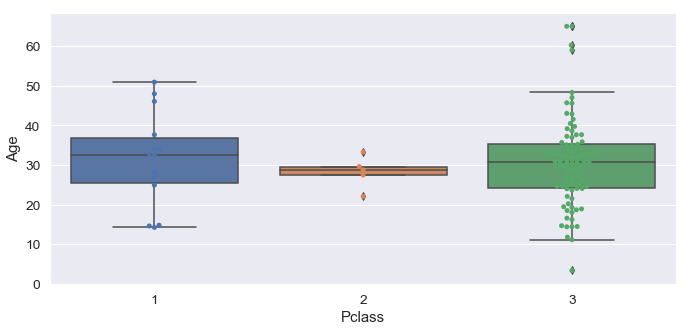

In [32]:
#观察预测结果
X_test['Age'] = pd.Series(age_preds)
f,ax=plt.subplots(figsize=(10,5))
sns.swarmplot(x='Pclass',y='Age',data=X_test)
sns.boxplot(x='Pclass',y='Age',data=X_test)

5、特征选择

（1）用 ANOVA方差分析的 F值 来对各个特征变量打分，判断各个特征对生还影响的大小：

In [33]:
import operator
from sklearn.feature_selection import SelectKBest, f_classif,chi2

target = train_data['Survived'].values
features= ['Age', 'Embarked', 'Fare', 'Parch','female','male',
           'Pclass', 'SibSp','NameHeadCat', 'FamilyCat', 'NameLengthCat','CabinNull',
           'child', 'female_adult', 'male_adult', 'CabinType','Ticket_Numbers', 'Ticket_dead_women',
           'Ticket_surviving_men','Ticket_Id','Surname_Numbers','Surname_dead_women','Surname_surviving_men',
           'Surname_Id']

#训练集与测试集分开
train = combine_data[0:891].copy()
test =combine_data[891:].copy()

selector = SelectKBest(f_classif, k=len(features))
selector.fit(train[features], target)
scores = -np.log10(selector.pvalues_)
indices = np.argsort(scores)[::-1]
print('Features importance :')
for f in range(len(scores)):
    print('%0.2f %s' % (scores[indices[f]],features[indices[f]]))

Features importance :
75.02 male_adult
68.85 female
68.85 male
63.47 female_adult
26.22 NameHeadCat
24.60 Pclass
23.69 NameLengthCat
17.75 CabinNull
17.41 Ticket_surviving_men
16.28 CabinType
14.21 Fare
13.54 Ticket_dead_women
13.16 Surname_surviving_men
10.36 Surname_dead_women
6.78 Embarked
5.27 Ticket_Numbers
3.32 child
2.93 FamilyCat
2.02 Parch
1.66 Age
1.07 Ticket_Id
0.73 Surname_Numbers
0.61 SibSp
0.08 Surname_Id


分数越高代表特征对生还的影响越大，选择该特征的必要性越高。

（2）特征间的相关性分析

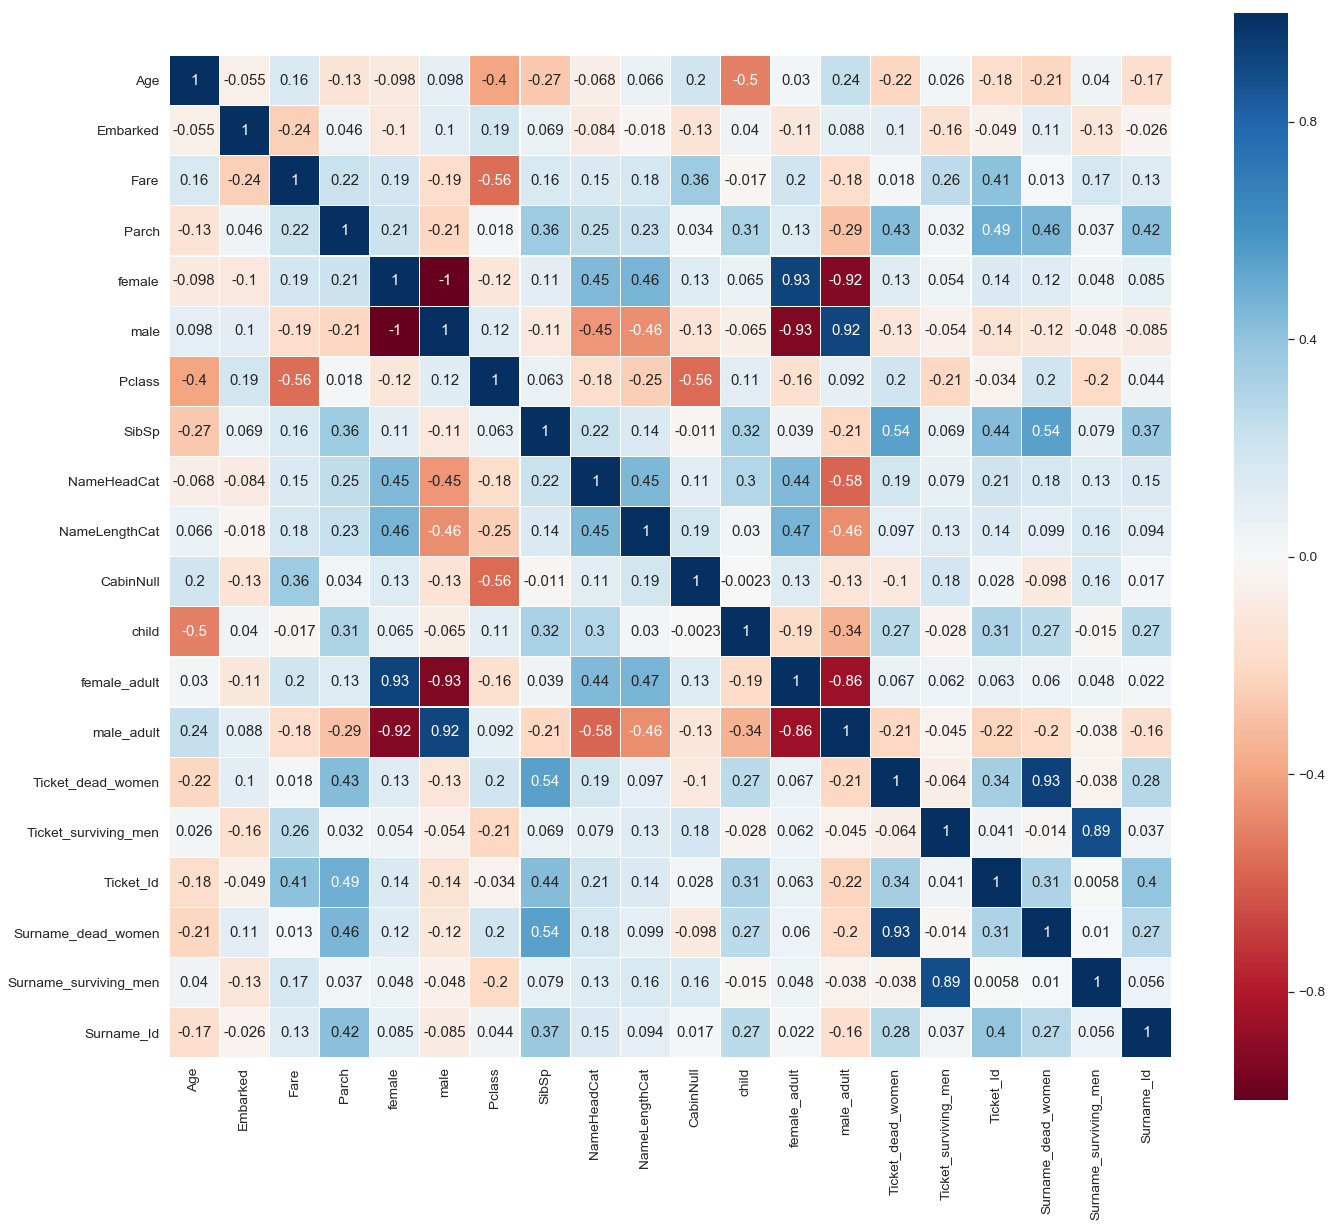

In [34]:
features_selected=features
df_corr=combine_data[features_selected].copy()

colormap=plt.cm.RdBu
plt.figure(figsize=(20,20))
sns.heatmap(df_corr.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

特征间的相关性也是选择特征的一个重要指标，如果特征间的相关性太大，可能导致过拟合现象。

# 建立模型及评估

In [35]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor,RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import cross_validation

#交叉验证，集成学习的普通随机森林建模
rfc=RandomForestClassifier(n_estimators=3000, min_samples_split=4, class_weight={0:0.745,1:0.255})
kf=cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)
scores=cross_validation.cross_val_score(rfc, train[features_selected], target, cv=kf)
print('Accuracy: %0.3f (+/- %0.2f) [%s]'% (scores.mean()*100, scores.std()*100, 'RFC Cross Validation'))
rfc.fit(train[features_selected], target)
score = rfc.score(train[features_selected], target)
print('Accuracy: %0.3f[%s]'% (score*100, 'RFC full test'))

#交叉验证，集成学习的极端随机森林建模
etr=ExtraTreesRegressor()
kf=cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)
scores=cross_validation.cross_val_score(etr, train[features_selected], target, cv=kf)
print('Accuracy: %0.3f (+/- %0.2f) [%s]'% (scores.mean()*100, scores.std()*100, 'etr Cross Validation'))
etr.fit(train[features_selected], target)
score = etr.score(train[features_selected], target)
print('Accuracy: %0.3f[%s]'% (score*100, 'etr full test'))

#交叉验证，集成学习的梯度提升树建模
gbr=GradientBoostingRegressor()
kf=cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)
scores=cross_validation.cross_val_score(gbr, train[features_selected], target, cv=kf)
print('Accuracy: %0.3f (+/- %0.2f) [%s]'% (scores.mean()*100, scores.std()*100, 'gbr Cross Validation'))
gbr.fit(train[features_selected], target)
score = gbr.score(train[features_selected], target)
print('Accuracy: %0.3f[%s]' % (score*100, 'gbr full test'))


#交叉验证，Logreg回归建模
Logreg = LogisticRegression()
kf=cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)
scores=cross_validation.cross_val_score(Logreg, train[features_selected], target, cv=kf)
print('Accuracy: %0.3f (+/- %0.2f) [%s]'% (scores.mean()*100, scores.std()*100, 'Logreg Cross Validation'))
Logreg.fit(train[features_selected], target)
score = Logreg.score(train[features_selected], target)
print('Accuracy: %0.3f[%s]' % (score*100, 'Logreg full test'))

#交叉验证，SVM建模
svc = SVC()
kf=cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)
scores=cross_validation.cross_val_score(svc, train[features_selected], target, cv=kf)
print('Accuracy: %0.3f (+/- %0.2f) [%s]'% (scores.mean()*100, scores.std()*100, 'svc Cross Validation'))
svc.fit(train[features_selected], target)
score = Logreg.score(train[features_selected], target)
print('Accuracy: %0.3f[%s]' % (score*100, 'svc full test'))

#交叉验证，KNN建模
knn = KNeighborsClassifier(n_neighbors=3)
kf=cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)
scores=cross_validation.cross_val_score(knn, train[features_selected], target, cv=kf)
print('Accuracy: %0.3f (+/- %0.2f) [%s]'% (scores.mean()*100, scores.std()*100, 'knn Cross Validation'))
knn.fit(train[features_selected], target)
score = knn.score(train[features_selected], target)
print('Accuracy: %0.3f[%s]' % (score*100, 'knn full test'))

#交叉验证，决策树建模
dec_tree = DecisionTreeClassifier()
kf=cross_validation.KFold(train.shape[0], n_folds=3, random_state=1)
scores=cross_validation.cross_val_score(dec_tree, train[features_selected], target, cv=kf)
print('Accuracy: %0.3f (+/- %0.2f) [%s]'% (scores.mean()*100, scores.std()*100, 'dec_tree Cross Validation'))
dec_tree.fit(train[features_selected], target)
score = knn.score(train[features_selected], target)
print('Accuracy: %0.3f[%s]' % (score*100, 'dec_tree full test'))


c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy: 89.450 (+/- 0.42) [RFC Cross Validation]
Accuracy: 96.184[RFC full test]
Accuracy: 56.510 (+/- 1.01) [etr Cross Validation]
Accuracy: 99.288[etr full test]
Accuracy: 60.642 (+/- 1.96) [gbr Cross Validation]
Accuracy: 77.162[gbr full test]
Accuracy: 88.552 (+/- 0.73) [Logreg Cross Validation]
Accuracy: 89.338[Logreg full test]
Accuracy: 66.891 (+/- 4.58) [svc Cross Validation]
Accuracy: 89.338[svc full test]
Accuracy: 70.258 (+/- 3.03) [knn Cross Validation]
Accuracy: 84.848[knn full test]
Accuracy: 83.502 (+/- 1.20) [dec_tree Cross Validation]
Accuracy: 84.848[dec_tree full test]


In [36]:
#由以上得分可见，集成学习的随机森林交叉验证评分及准确率最高，效果最好；用集成学习的随机森林预测结果：
rfc.fit(train[features_selected], target)
predictions = rfc.predict(test[features_selected])

#保存输出文件
PassengerId =np.array(test['PassengerId']).astype(int)
subminssion = pd.DataFrame(predictions, PassengerId, columns = ['Survived'])

subminssion.to_csv(r'D:\practice\Titannic\new_prediction.csv', index_label = ['PassengerId'])


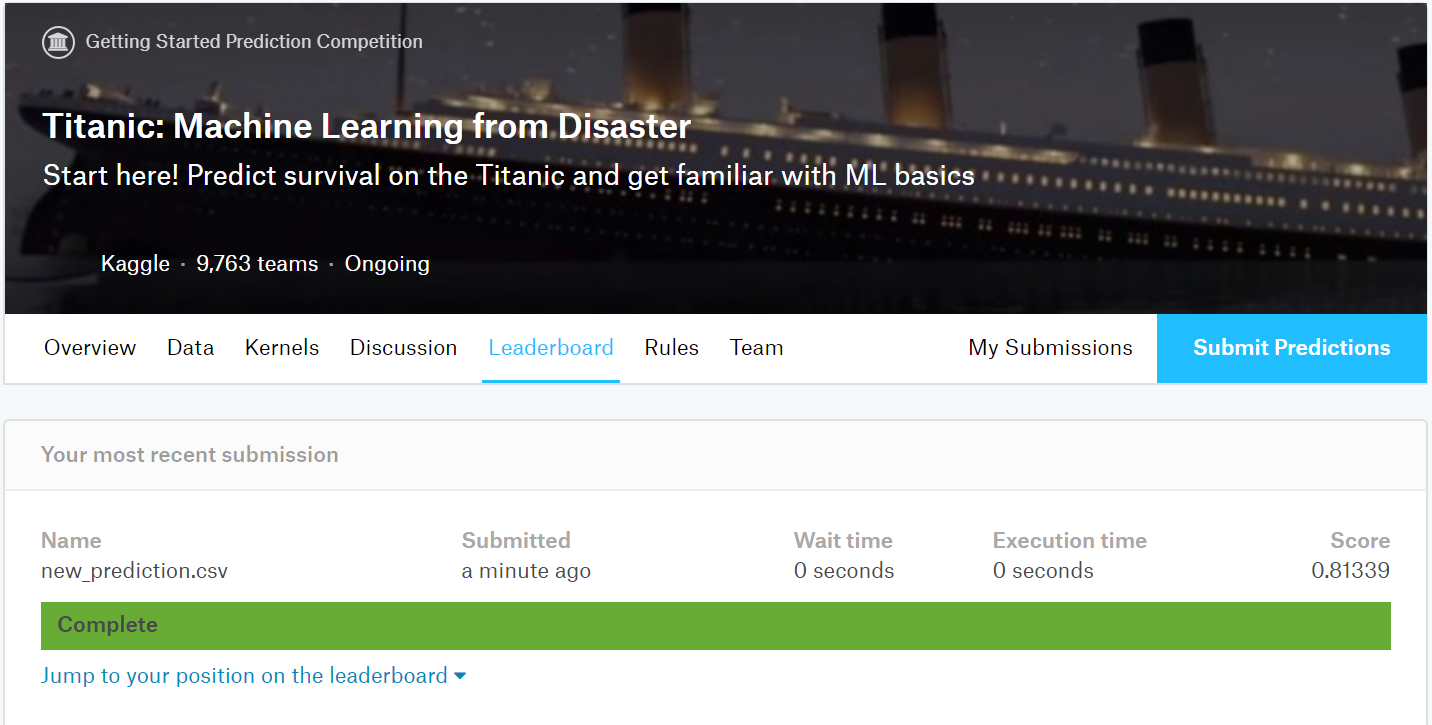

将文件提交到kaggle，评分0.81339，四百多名，排名前5%。

# 总结与思考

该项目数据复杂度相对较高，特征多，通过该项目很好的练习了特征工程及机器学习建模评估，对python的numpy、pandas、matplotlib、seaborn、sklearn等数据分析常用库的使用更加熟练，理解更深入，对常用分类机器学习模型进一步熟悉。但是仍有很多改进之处，首先是机器学习各个模型每个参数的作用和意义需要进一步学习，进而对模型调参更加熟练掌握；第二，提取更多衍生特征，提高输入模型的数据质量；第三，尝试更多模型及高级模型融合；第四，提高数据敏感度，对数据集中隐蔽的异常值进一步检测处理。